In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For Data Augmentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , MaxPool2D , MaxPooling2D
from tensorflow.keras.layers import Conv2D , Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

<b>Read the Dataset from Directory

In [2]:
# Create the Function that convert the Dataset into Images and the Label
def load_dataset(dataset_path):
    
    # Define the List for Images and Labels
    Images , Labels = [] , []
    
    label = 0
    # Iterate the Dataset with Folder Name
    for folder_name in os.listdir(dataset_path):
        # Get the Image Folder
        images_path = os.path.join(dataset_path , folder_name)
        for images in os.listdir(images_path):
            # Get the Image from the Each Folder
            image_path = os.path.join(images_path , images)
            # Read the Image
            pil_image = Image.open(image_path)
            
            # Resize the Image
            resized_image = pil_image.resize((150,150))
            
            # Convert the Numpy Array
            cv2_image = np.array(resized_image)
            
            # Change the Type of the Image
            cv2_image = cv2_image.astype("float32")
            
            # Normalize the Data of Image
            cv2_image = cv2_image / 255
            
            # Append the Images and Labels in the List
            Images.append(cv2_image)
            Labels.append(label)
            
        label += 1
    return Images , Labels

In [3]:
# Define the Path of the Dataset
dataset_path = "E:/software/Test Task/Ass 3/Dataset"

# Call the load_dataset function 
test_images , test_labels = load_dataset(dataset_path)

# Display the Shape of the Test Images and Labels
print(f"Shape of the Test Images is : {np.shape(test_images)}")
print(f"Shape of the Test Labels is : {np.shape(test_labels)}")

Shape of the Test Images is : (35, 150, 150, 3)
Shape of the Test Labels is : (35,)


In [4]:
# Now Convert the Images and Label in the Numpy Array
X_test = np.array(test_images)
Y_test = np.array(test_labels)

# Display the Shape of the X and Y 
print(f"Shape of the X is : {X_test.shape}")
print(f"Shape of the Y is : {Y_test.shape}")

Shape of the X is : (35, 150, 150, 3)
Shape of the Y is : (35,)


<b>Define Label of Dataset

In [5]:
# Define the Label of the Images
def class_label(index):
    label = ["Circle" , "Diamond" , "Horizontal Rectangle" , "Octagon" , "Pentagon" , "Square" , "Vertical Rectangle"]
    return label[index]

<b>Data Augmenation (Creating the Dataset)

In [6]:
# Create Object of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="constant",
    cval = 125
)

In [7]:
# Creating the Dataset with Directory
train_generator = train_datagen.flow_from_directory(
    directory = "E:/software/Test Task/Ass 3/Dataset", 
    batch_size = 16, 
    target_size = (150,150), 
    save_prefix = "shape", 
    save_format = "jpg")

Found 35 images belonging to 7 classes.


In [8]:
# Define the Numpy Matrix for Training the Model
train_images , train_labels =  [] , []

In [9]:
count = 1
for inputs , labels in train_generator:
    for index in range(len(inputs)):
        image = inputs[index]
        label = labels[index]
        
        # Convert the Image Type into Uint8 & PIL Format
        image_uint8 = (image * 255).astype(np.uint8)
        pil_image = Image.fromarray(image_uint8)
        
        train_images.append(image_uint8)
        train_labels.append(label)
        
        if count == 1000:
            break
            
        count += 1
        
    if count == 1000:
        break

<b>Preprocessing Training Images

In [10]:
# Convert the Images and Labels in Numpy Array
X_train = np.array(train_images)
Y_train = np.array(train_labels)

# Normalize the Data
X_train = X_train.astype(np.float32) / 255.

# Display the Shape of the Image
print(f"Shape of X Train is : {X_train.shape}")
print(f"Shape of Y Train is : {Y_train.shape}")

Shape of X Train is : (1000, 150, 150, 3)
Shape of Y Train is : (1000, 7)


<b>Now Train the CNN Model

In [11]:
model = Sequential()

# First Convolutional Layer 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
# Now fit the Model in the Data Augmentation Dataset
history = model.fit(
    X_train,
    Y_train,
    batch_size = 16,
    epochs = 5
)

Epoch 1/5
63/63 [==============================] - 38s 588ms/step - loss: 1.2211 - accuracy: 0.4780
Epoch 2/5
63/63 [==============================] - 41s 648ms/step - loss: 0.5885 - accuracy: 0.7750
Epoch 3/5
63/63 [==============================] - 36s 561ms/step - loss: 0.3191 - accuracy: 0.8890
Epoch 4/5
63/63 [==============================] - 36s 564ms/step - loss: 0.1808 - accuracy: 0.9430
Epoch 5/5
63/63 [==============================] - 39s 626ms/step - loss: 0.1206 - accuracy: 0.9560


<b>Save/Load CNN Model

In [14]:
# Save the CNN Model in H5 File
model.save("E:/software/Test Task/Ass 3/cnnModel.h5")

# Load the CNN Model H5 File
model = load_model("E:/software/Test Task/Ass 3/cnnModel.h5")

<b>Predict the Results 

In [15]:
# Defie the List for Y_Prediction
y_pred = []
y_label = []

# Get the Images in X Matrix
for index in range(len(X_test)):
    image = X_test[index]
    
    # Now Predict the Image
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    label = np.argmax(prediction)
    
    y_pred.append(class_label(label))
    
    y_label.append(label)

1/1 [==============================] - 0s 38ms/step


<b>Display Predicted Images with Labels

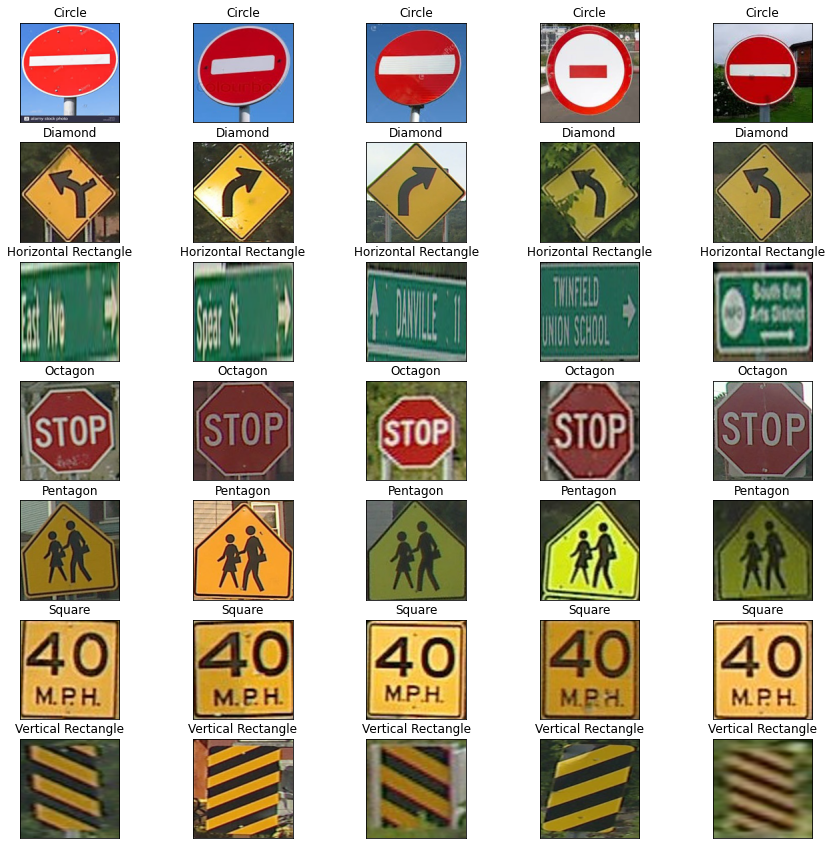

In [16]:
# Display the Predicted Images with Labels
plt.figure(figsize = (15,15))
for index in range(len(X_test)):
    image = X_test[index]
    
    # Now Reshape the Image
    #resized_image = cv2.resize(image , (250,250))
    
    plt.subplot(7,5,index+1)
    plt.title(f"{y_pred[index]}" )
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.show()

<b>Evaluation

In [17]:
# Calculate the Accuracy Score in the Testing Dataset
acc_score = accuracy_score(test_labels , y_label)
print("The Accuracy of the Model in the Testing Dataset is : {}".format(np.round(acc_score , 2)))

The Accuracy of the Model in the Testing Dataset is : 1.0
